# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform feature selection. 

👇 Run the cell below to load your preprocessed dataset.

In [43]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,SalePrice,GarageRoughFinished,GarageUnfinished,GarageNo,sin_MoSold,cos_MoSold
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,1,208500,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,1,181500,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,1,223500,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.391036,0.375,0.333333,0.500,0.442583,Unf,1,140000,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134467,0.500,0.333333,0.500,0.566894,RFn,1,250000,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


# Collinearity investigation

👇 Plot a heatmap of the Pearson Correlation between the dataset columns.

<AxesSubplot:>

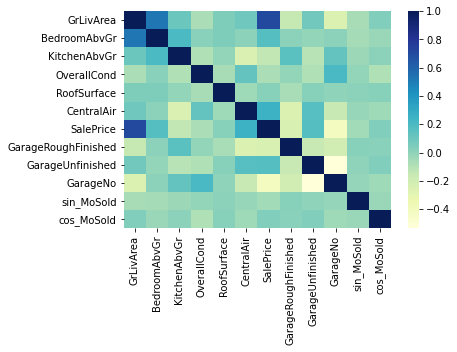

In [2]:
# YOUR CODE HERE

import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

👇 Visualize the correlation between column pairs in a dataframe.

In [3]:
# YOUR CODE HERE

corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.708524
72,SalePrice,GrLivArea,0.708524
12,BedroomAbvGr,GrLivArea,0.521522
1,GrLivArea,BedroomAbvGr,0.521522
77,SalePrice,CentralAir,0.251487


❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [33]:
# YOUR CODE HERE

exce_corr = 0.9

correlated_features = (corr_df[corr_df['correlation']>exce_corr]['correlation'].count()/2 + 
                       corr_df[corr_df['correlation']<-exce_corr]['correlation'].count()/2)

correlated_features

0.0

### ☑️ Test your code

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [13]:
# YOUR CODE HERE

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,SalePrice,GarageRoughFinished,GarageUnfinished,GarageNo,sin_MoSold,cos_MoSold
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,1,208500,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,1,181500,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,1,223500,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.391036,0.375,0.333333,0.500,0.442583,Unf,1,140000,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134467,0.500,0.333333,0.500,0.566894,RFn,1,250000,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


In [37]:
# Import the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Instanciate the model
model = LinearRegression()

# Define X and y

target_encoder = LabelEncoder().fit(data['SalePrice']) # Fit target encoder

y = target_encoder.transform(data['SalePrice']) # Encode target
X = data.drop(columns=['GarageFinish', 'SalePrice'])# Create feature set



👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [40]:
# Train the model on the data
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=10) # Cross validate

base_model_score = scores.mean()

### ☑️ Test your code

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [44]:
# YOUR CODE HERE

from sklearn.inspection import permutation_importance

# Instanciate the model
# model = LinearRegression()

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,0.800663
8,GarageNo,0.265625
6,GarageRoughFinished,0.103081
1,BedroomAbvGr,0.02921
5,CentralAir,0.022031
2,KitchenAbvGr,0.019383
7,GarageUnfinished,0.005218
9,sin_MoSold,0.002417
3,OverallCond,0.000388
10,cos_MoSold,0.000056


❓ Which feature is the most important? Save your answer as a `string` under variable name `best_feature`.

In [45]:
# YOUR CODE HERE

best_feature = 'GrLivArea'

### ☑️ Test your code

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [52]:
# YOUR CODE HERE

X = X.drop(columns=['RoofSurface']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()
scores.mean()

0.6833306127930381

### ☑️ Test your code

In [53]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


# 🏁